# Regresión Lineal

Lizbeth Peralta Malváez, Omar López Rincón.

Universidad de las Américas Puebla

La regresión lineal permite hallar un valor esperado de una variable aleatoria a cuando b toma un valor específico. 

Un método utilizado para la regresión lineal es el de mínimos cuadrados, el cual consiste en minimizar la suma de las distancias verticales entre los puntos de la muestra y los puntos del modelo.

<img src = "http://scikit-learn.sourceforge.net/0.6/_images/plot_sgd_ols.png">

Para propósitos de ilustración, se presenta el código en python para utilizar el método de mínimos cuadrados. Se utiliza una base de datos del  <a href = "http://archive.ics.uci.edu/ml/index.html"> Repositorio de Machine Learning de la Universidad de California </a> el cual presenta los incendios forestales en Portugal.

Se tienen 517 instancias con las siguientes características:

X - coordenada x en el mapa del parque Montesinho

Y - coordenada y en el mapa del parque Montesinho

month - mes del año

day - día de la semana

FFMC - valor FFMC

DMC - valor DMC

DC - valor DC

ISI - valor ISI

temp - temperatura en Celsius

RH - humedad

wind - velocidad del viento en km/h

rain - lluvia

area - area quemada en el bosque

# Código

In [2]:
#Importar pandas para leer el documento csv
#Importar matplotlib.pyplot para graficar
#Importar statsmodels.formula.api para utilizar el mínimo de cuadrados

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Permite graficar en notebook
%matplotlib inline

In [4]:
# Se lee el documento csv con la información, en este caso se utiliza una base de datos del Machine Learning Repository
#que consta de incendios forestales de Portugal

data = pd.read_csv('C:/Users/Liz/Downloads/forestfires.csv')#,index_col=0)
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


Se puede apreciar en la tabla toda la información dada por el repositorio ya mencionado

In [4]:
#tamaño del set

data.shape

(517, 13)

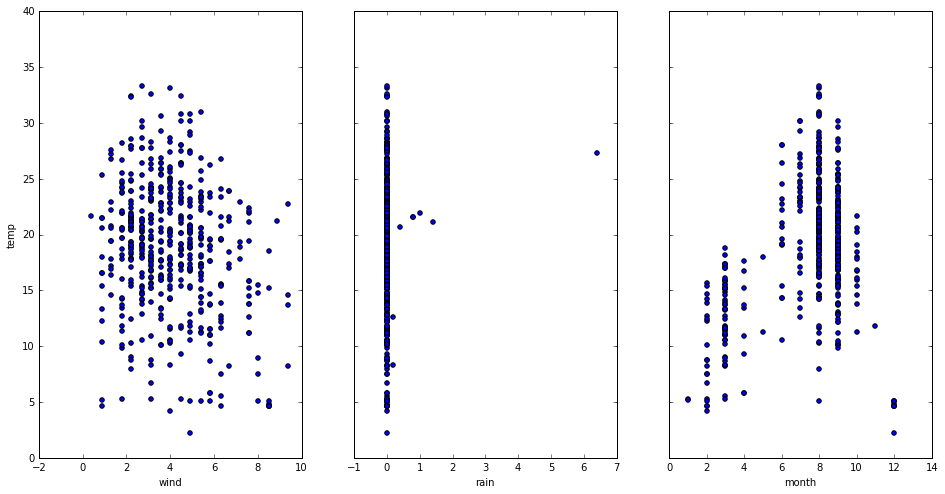

In [5]:
#graficas con las relaciones seleccionadas. Se seleccionó el sujeto, la edad y el sexo relacionado con UPDRS (estudio para saber
#el nivel de parkinson de la persona)

fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='wind', y='temp', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='rain', y='temp', ax=axs[1])
data.plot(kind='scatter', x='month', y='temp', ax=axs[2])

In [8]:
#ols = ordinary least squares
lm = smf.ols(formula='temp ~ month', data=data).fit()

# print the coefficients
#La relación entre la temperatura y el mes 
#Una unidad que incrementa la temperatura está aasociada con un .94 de unidad en el mes

lm.params

Intercept    11.854362
month         0.941008
dtype: float64

In [11]:
#predicción para una persona de 95 años
X_new = pd.DataFrame({'month': [12]})
X_new.head()

,month
0,12


In [12]:
# predicción de un nuevo valor
lm.predict(X_new)

array([ 23.14645484])

In [13]:
#LEAST SQUARE 
X_new = pd.DataFrame({'month': [data.month.min(), data.month.max()]})
X_new.head()

,month
0,1
1,12


In [14]:
# predicciones para x valores 
preds = lm.predict(X_new)
preds

array([ 12.79536947,  23.14645484])

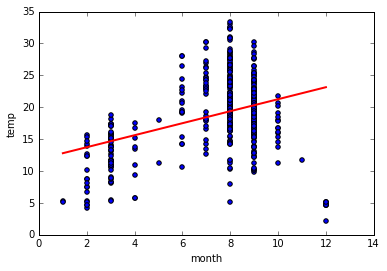

In [15]:
data.plot(kind='scatter', x='month', y='temp')
plt.plot(X_new, preds, c='red', linewidth=2)